tf.Tensor(
[[[1.  0.  0. ]
  [0.  1.  0. ]]

 [[0.  0.  1. ]
  [0.1 0.1 0.1]]], shape=(2, 2, 3), dtype=float32)


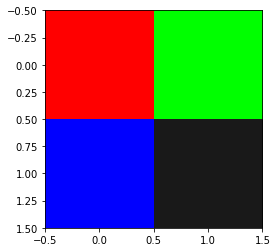

NameError: name 'model' is not defined

In [9]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

t = tf.constant([
    [[1,0,0],[0,1,0]],
    [[0,0,1],[0.1,0.1,0.1],]
])

print(t)
plt.imshow(t)
plt.show()

t4 = tf.constant([
    [[1.0,0,0],[.8,0,0],[0.6,0,0],[0.4,0,0]],
    [[0,1,0],[0,0.8,0],[0,0.6,0],[0,0.4,0]],
    [[0,0,1],[0,0,0.8],[0,0,0.6],[0,0,0.4]],
    [[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]]
])
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

label = 5
im = test_images[1]

# im = tf.convert_to_tensor([im])
pred = model(im)
print(pred)

label = tf.one_hot(label, 10)
label = tf.reshape(label, (1,10))

with tf.GradientTape() as tape:
    tape.watch(im)
    prediction = model(im)
    loss = loss_object(im, prediction)
# Get the gradients of the loss w.r.t to the input image.
gradient = tape.gradient(loss, im)
# Get the sign of the gradients to create the perturbation
signed_grad = tf.sign(gradient)

print(signed_grad)

In [2]:


mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False

# need labels from CIFAR
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_model_label(probs):
  return decode_predictions(probs, top=1)[0][0]


x = preprocess(x)
x_prob = pretrained_model.predict(x)

# plt.figure()
# plt.imshow(x[0]*0.5+0.5) # To change [-1, 1] to [0,1]
# _, image_class, class_confidence = get_model_label(x_prob)
# plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
# plt.show()
# plt.imshow((x[0]*0.5 + 0.5) * 0.8)
# plt.show()
plt.figure(figsize=(10,10))
ind = 1
for i in range(3):
    plt.subplot(3,2,ind)

    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel("l: {ind}".format(ind = ind))
    plt.subplot(3,2,ind+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel("r:{ind}".format(ind = ind+1))
    ind += 2
plt.show()






NameError: name 'mpl' is not defined

In [ ]:
label = 5
im = test_images[1]

# im = tf.convert_to_tensor([im])
pred = model(im)
print(pred)

label = tf.one_hot(label, 10)
label = tf.reshape(label, (1,10))

with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)
    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)

In [ ]:
image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)


#shape of image: 
print(tf.shape(image))
t = tf.tensor([0][0][0])
print(t)

In [ ]:
# plt.figure()
# plt.imshow(image[0]*0.5+0.5) # To change [-1, 1] to [0,1]
# _, image_class, class_confidence = get_model_label(image_probs)
# plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
# plt.show()

# x = tf.constant([[1],[2],[3]], tf.int32)
# print(tf.shape(x))
# x = tf.reshape(x,[3])
# print(tf.shape(x))

# # print(tf.shape(image_probs))


# pred = pretrained_model(image)
# # print(tf.shape(pred))
# # print(tf.shape(image))

loss_object = tf.keras.losses.CategoricalCrossentropy()
def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = pretrained_model(input_image)
        loss = loss_object(input_label, prediction)
        #     print("input label", tf.shape(input_label))
        #     print("pred:" ,tf.shape(prediction))
        print('loss', loss)
        print('pred', prediction)

    # Get the gradients of the loss w.r.t to the input image.
    print('image:', input_image)
    gradient = tape.gradient(loss, input_image)
    print("gradd:", gradient)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

labrador_retriever_index = 208
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
print(perturbations)
plt.imshow(perturbations[0]*0.5+0.5)
plt.show()